In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import matplotlib
import numpy.polynomial.polynomial as poly
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams["font.sans-serif"] = "Arial"

In [2]:
design_mat = scipy.io.loadmat('force_sweep_e.mat')['energy_min']

In [3]:
f_num = design_mat.shape[0]
d_num = design_mat.shape[1]
design_mat.shape

(11, 9)

In [4]:
displacement = .4/(d_num-1)
disp_grid = displacement*np.arange(d_num)

f_grid = -.2+.04*np.arange(f_num)

In [5]:
def extract_stiffness_list(design_mat):
    
    stiffness = []

    for fi in np.arange(f_num):

        energy = design_mat[fi]

        r = .1
        l = 1
        m = f_grid[fi]
        c = 50

        switches = np.sign(np.diff(energy))
        if np.sum(np.abs(np.diff(switches))/2) > 0:
            quality = 0
        else:
            quality = 1
        
        k = poly.polyfit(disp_grid,energy-energy[0],[2])[-1]
            
        stiffness.append([r,l,m,c,quality,k])
                    
    return np.array(stiffness)

def extract_stiffness_mat(design_mat):
    
    stiffness = np.zeros((f_num,2))

    for fi in np.arange(f_num):
                    
        energy = design_mat[fi]

        switches = np.sign(np.diff(energy))
        if np.sum(np.abs(np.diff(switches))/2) > 0:
            quality = 0
        else:
            quality = 1

        k = poly.polyfit(disp_grid,energy-energy[0],[2])[-1]
        
        stiffness[fi,0] = k
        stiffness[fi,1] = quality
                    
                    
    return np.array(stiffness)

In [6]:
stiffness_list = extract_stiffness_list(design_mat)

stiffness_mat = extract_stiffness_mat(design_mat)
stiffness_mat.shape

(11, 2)

In [7]:
R = .1
c = 1/np.tan(50/180*np.pi)
theory_grid = -.2+.04/25*np.arange(25*f_num)
f = (theory_grid)/2/np.pi
k_theory = -np.pi*(2*f+c)*(f*(1+R**2)+R**2*c)/(1-R**2)

In [8]:
B0 = -f
A = 2*(c - B0);
A1 = (2*B0 - c)/(1-R*R);
B1 = R*R*A1;
k_theory_check = np.pi/2*(A*(A/4 + B0/2 + A1 + B1) - c*(A/2 + 2*A1))

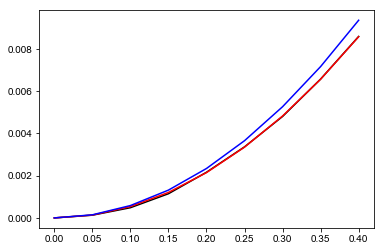

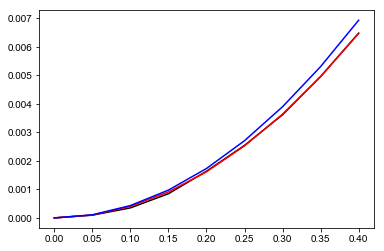

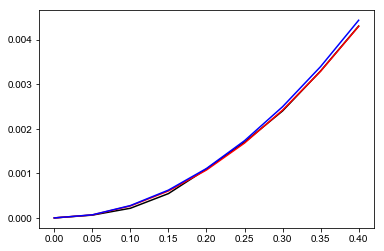

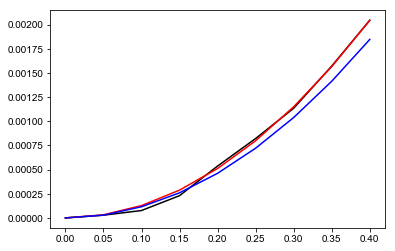

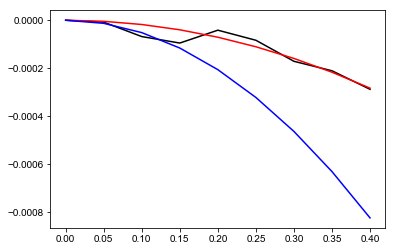

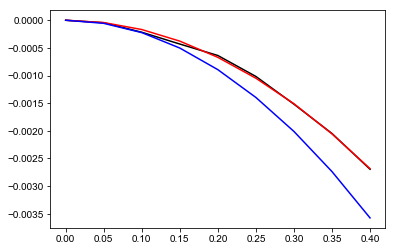

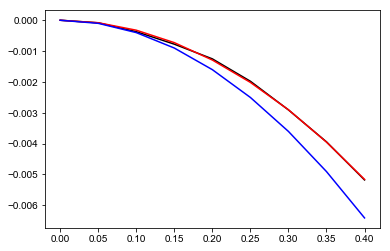

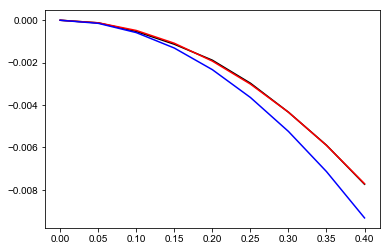

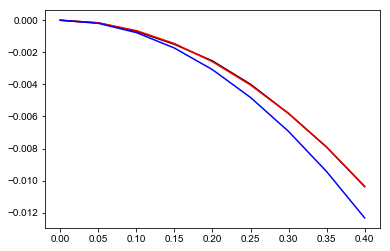

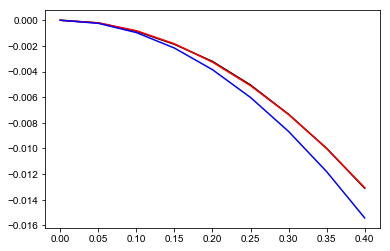

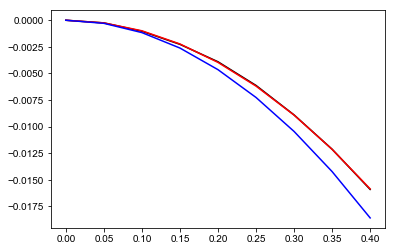

In [10]:
for i in np.arange(f_num):
    plt.figure()
    plt.plot(disp_grid,design_mat[i]-design_mat[i][0],color='black')
    plt.plot(disp_grid,stiffness_list[i,-1]*disp_grid**2,color='red')
    plt.plot(disp_grid,k_theory[25*i]*disp_grid*disp_grid,color='blue')
    plt.show()

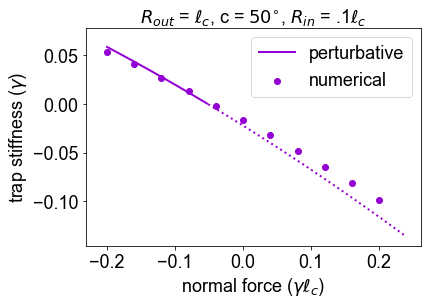

In [13]:
plt.scatter(stiffness_list[:,2],stiffness_list[:,-1],label='numerical',color='darkviolet')
stable = k_theory > 0
unstable = k_theory < 0
plt.plot(theory_grid[stable],k_theory[stable],label='perturbative',color='darkviolet',linewidth=2)
plt.plot(theory_grid[unstable],k_theory[unstable],color='darkviolet',linewidth=2,linestyle=':')
plt.title(r'$R_{out}$ = $\ell_c$, c = $50^{\circ}$, $R_{in}$ = .1$\ell_c$',fontsize=18)
plt.xlabel('normal force ($\gamma\ell_c$)')
plt.ylabel(r'trap stiffness ($\gamma$)')
plt.legend()
plt.savefig('force_sweep_stiffness.pdf',format = 'pdf',bbox_inches="tight")
plt.show()